In [1]:
import warnings
warnings.filterwarnings("ignore")

### Loading the Data

In [2]:
import pandas as pd
pd.set_option("display.max_columns",None)

In [3]:
WASTE_GENERATION_df = pd.read_csv("C:/Users/hp/Desktop/Projects/Business-Sustainability-through-Environmental-Impact-Analysis/Data/Waste Generation/municipal waste.csv")
WASTE_GENERATION_df.head()

region               province                  name          tc  \
0  Emilia_Romagna                Ferrara             Comacchio  502.250000   
1  Emilia_Romagna                Ferrara             Lagosanto  228.050003   
2  Emilia_Romagna                Ferrara                  Goro  268.010010   
3  Emilia_Romagna                Ferrara                Mesola  199.089996   
4          Puglia  Barletta-Andria-Trani  Margherita di Savoia  233.639999   

         cres       csor   istat        area    pop  alt  isle  sea  \
0  129.270004  66.419998   38006  283.750000  22648  1.0   0.0  1.0   
1   49.520000  44.139999   38011   34.439999   4952  1.0   0.0  1.0   
2   50.610001  44.599998   38025   26.620001   3895  1.0   0.0  1.0   
3   41.110001  40.439999   38014   84.300003   7140  1.0   0.0  1.0   
4   58.270000  25.950001  110005   35.700001  12193  1.0   0.0  1.0   

         pden           wden  urb       fee  d_fee  sample    organic  \
0   79.816742  119671.476562  2.0      PAYT      1       1        NaN   
1  143.786301   70030.984375  3.0      PAYT      1       1  35.040904   
2  146.318558   81116.523438  3.0      PAYT      1       1  37.377010   
3   84.697502   43320.460938  3.0      PAYT      1       1  45.310474   
4  341.540619  201565.265625  2.0  STANDARD      0       0   0.428440   

       paper     glass      wood     metal   plastic      raee    texile  \
0   4.363508  3.592508  2.269844  0.462317  1.131815  0.346470  0.112243   
1   9.887817  9.518352  4.001796  1.860965  4.643623  1.608505  0.351429   
2  11.991079  6.653014  0.000013  0.744725  5.224834       NaN  0.449308   
3   9.762878  7.551381  0.148580  0.746540  5.202531       NaN  0.400064   
4   6.601569  4.334883  2.296731  0.103101  5.120555  0.275157  0.287387   

       other      msw_so    msw_un       msw    sor  geo  roads  s_wteregio  \
0   3.199499  20396261.0  13560520  33956781  60.07  3.0  285.0   33.105049   
1   9.019776   1831407.0    580460   2411867  75.93  3.0   11.0   33.105049   
2  16.040081   1694922.0    464400   2159322  78.49  3.0   49.0   33.105049   
3   9.769176   2881055.0    770860   3651915  78.89  3.0  165.0   33.105049   
4   4.052555   3026700.0   4169180   7195880  42.06  1.0   60.0    4.046452   

   s_landfill       gdp    proads      wage   finance  
0   15.233530  7.269942  4.354818  9.438692  7.488041  
1   15.233530  7.109984  6.082588  9.510139  7.323284  
2   15.233530  7.267856  4.335555  8.891356  7.485891  
3   15.233530  7.085936  3.710479  9.433685  7.298514  
4   45.411903  7.247444  5.274037  9.125561  7.464867

In [4]:
WASTE_GENERATION_df.isnull().mean()*100

region         0.000000
province       0.000000
name           0.138217
tc             0.000000
cres           1.197881
csor           1.543423
istat          0.000000
area           0.138217
pop            0.000000
alt            0.138217
isle           0.138217
sea            0.138217
pden           0.138217
wden           0.138217
urb            0.138217
fee            0.000000
d_fee          0.000000
sample         0.000000
organic       11.794517
paper          0.575904
glass          0.760194
wood          25.224603
metal          5.666897
plastic        0.898411
raee           7.233356
texile        23.335637
other          3.132919
msw_so         0.000000
msw_un         0.000000
msw            0.000000
sor            0.000000
geo            6.565308
roads         10.205022
s_wteregio     6.565308
s_landfill     6.565308
gdp            8.891960
proads        10.205022
wage           6.565308
finance        8.891960
dtype: float64

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_columns = ["region","province","name","istat","isle","sea","urb","fee","d_fee","sample","geo"]


<Axes: >

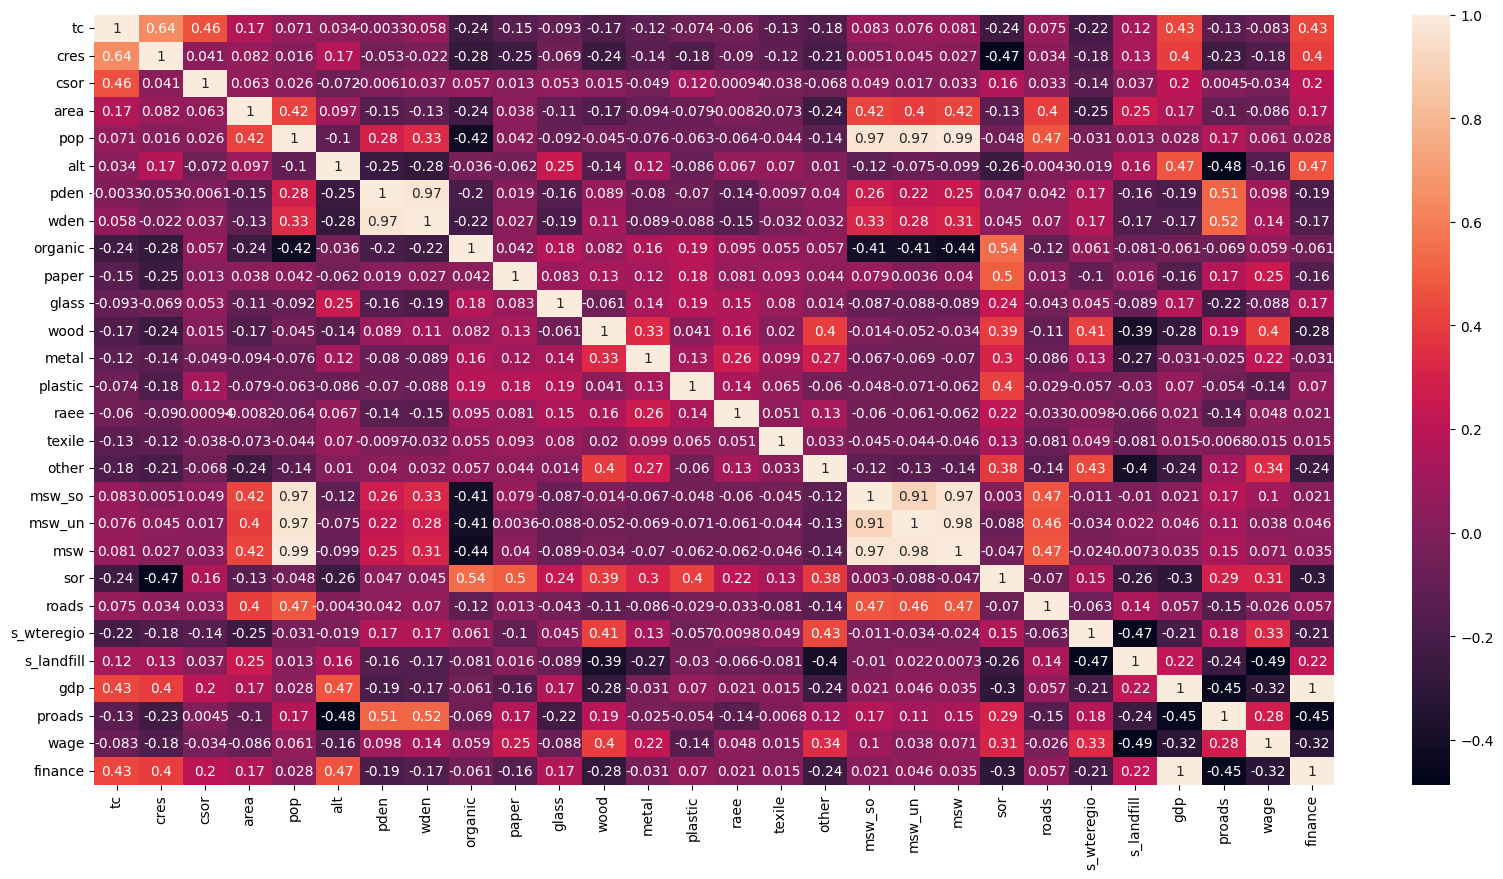

In [6]:
plt.figure(figsize=(20,10))
sns.heatmap(WASTE_GENERATION_df.drop(categorical_columns,axis=1).corr(),annot = True)

In [7]:
# wden-pden 

# pop-msw_so,msw_un,msw
# msw_so-msw_un,msw
# msw_un-msw_so,msw

# gdp-finance


<Axes: >

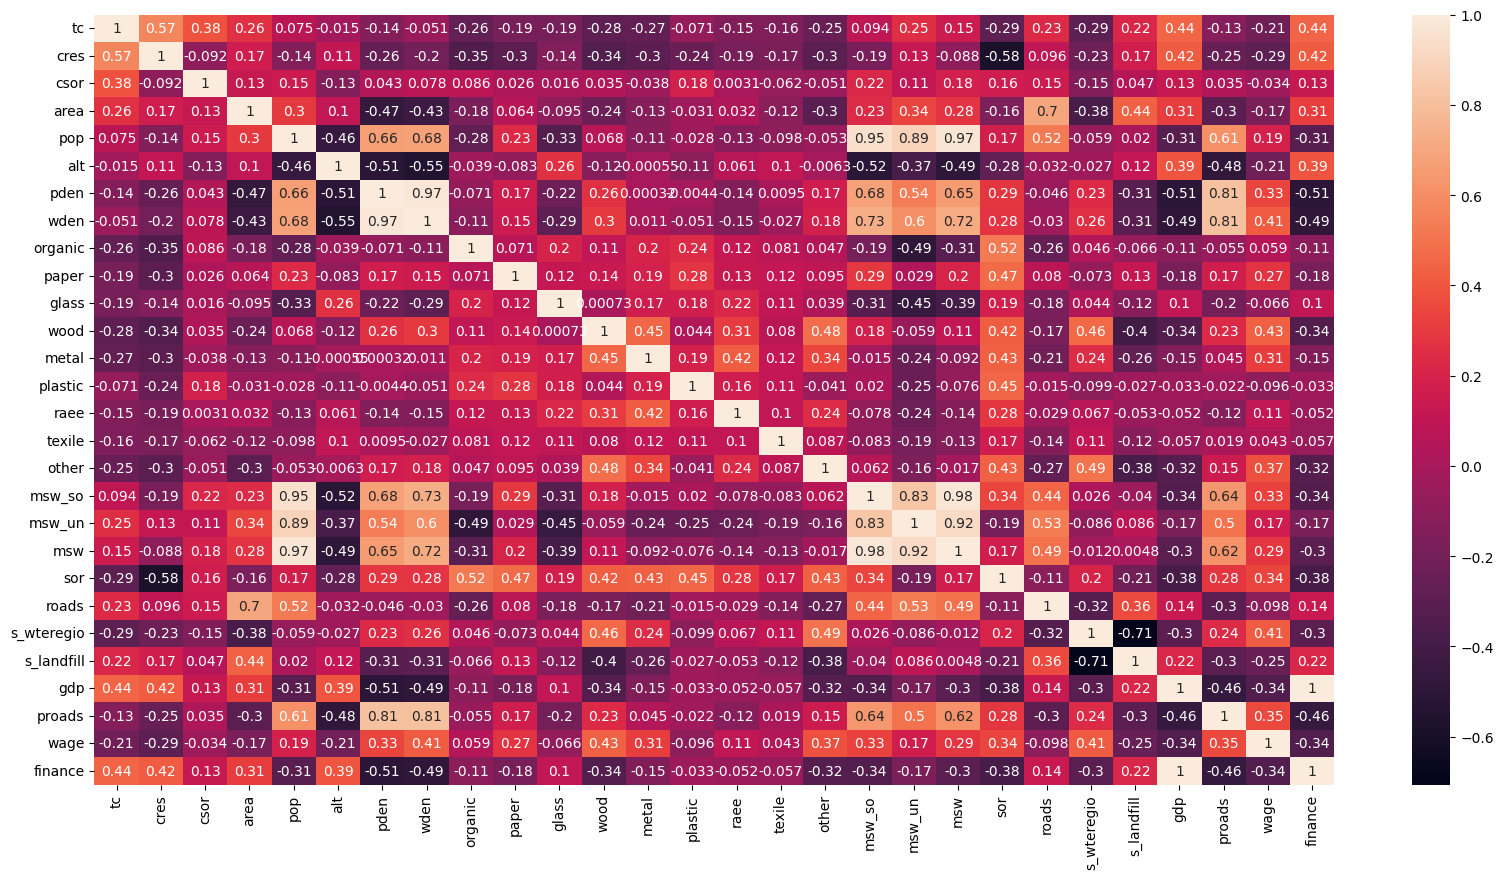

In [8]:
plt.figure(figsize=(20,10))
sns.heatmap(WASTE_GENERATION_df.drop(categorical_columns,axis=1).corr(method='spearman'),annot = True)

In [9]:
# proads-pden,wden

In [10]:
# we can remove proads feature can keep either pden or wden
# we can keep pop and remove msw_so,msw_un,msw
# we will remove gdp and keep finance

In [11]:
WASTE_GENERATION_df.drop(['proads','wden','msw_so','msw_un','msw','gdp'],axis=1,inplace=True)
WASTE_GENERATION_df.reset_index(drop=True,inplace=True)

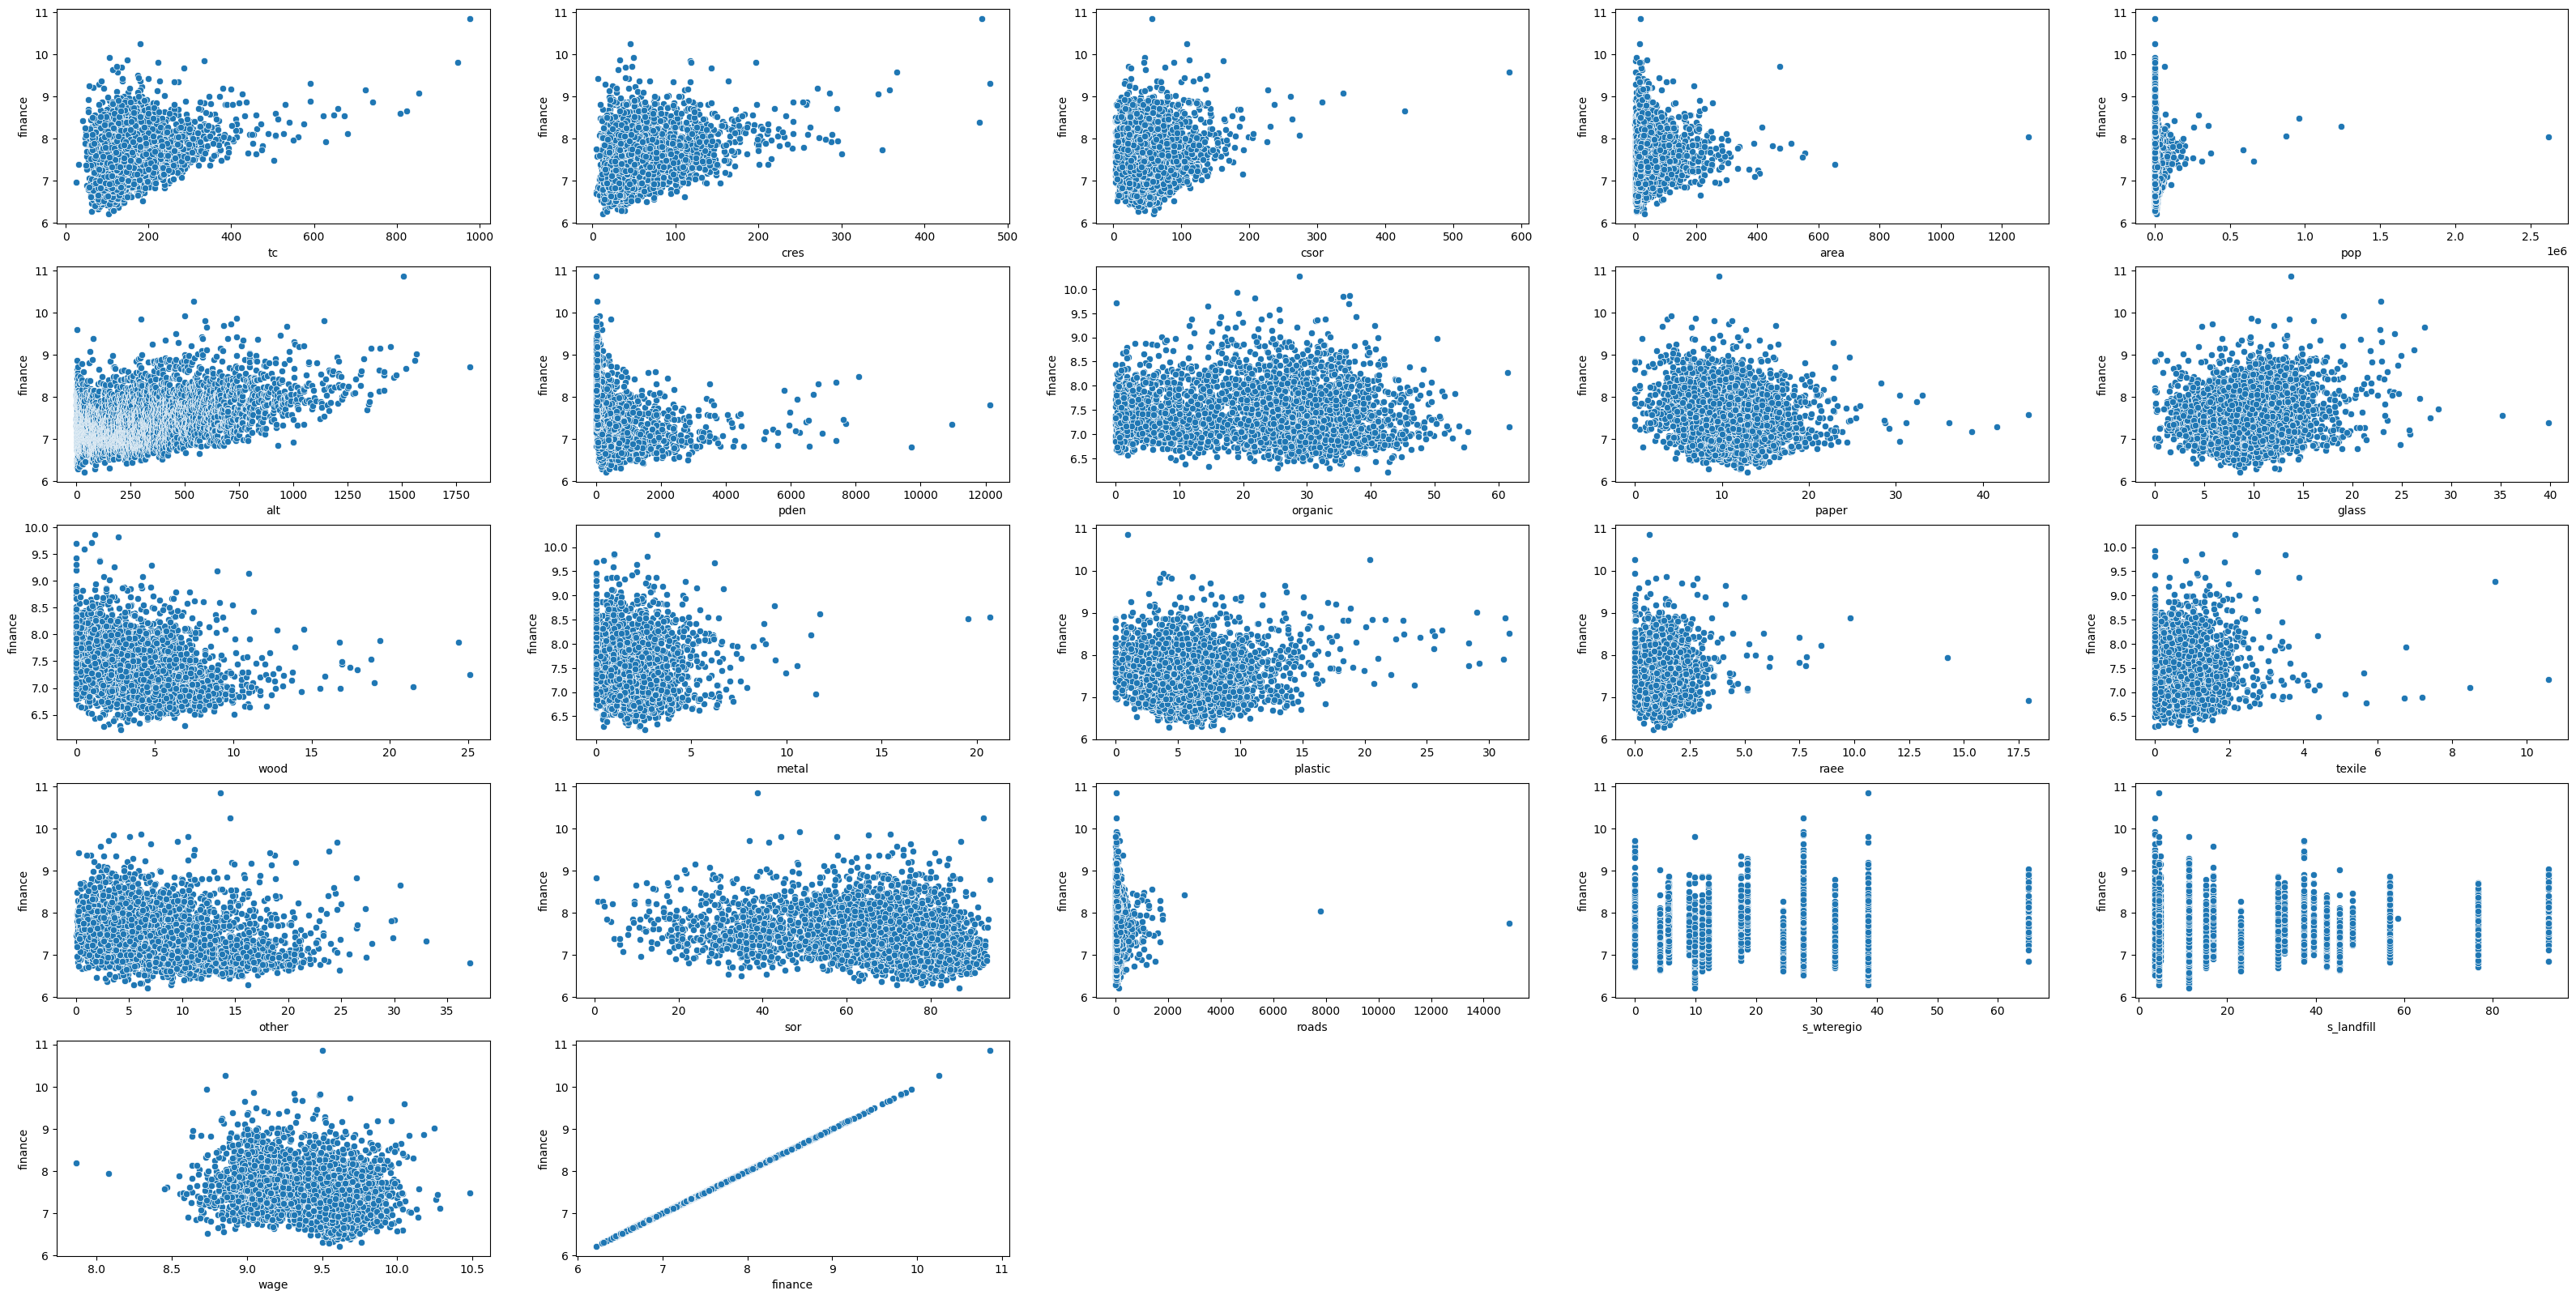

In [12]:
numerical_columns = WASTE_GENERATION_df.drop(categorical_columns, axis=1).columns
numerical_columns

plt.figure(figsize=(40,20))
for idx,col in enumerate(numerical_columns):
    plt.subplot(5,5,idx+1)
    sns.scatterplot(x = WASTE_GENERATION_df[col],y = WASTE_GENERATION_df['finance'])

In [13]:
# 's_wteregio','s_landfill' cannot be be treated as neither categorical or numerical

In [14]:
WASTE_GENERATION_df.drop(['s_wteregio','s_landfill'],axis=1,inplace=True)
WASTE_GENERATION_df.reset_index(drop=True,inplace=True)

In [15]:
WASTE_GENERATION_df.isnull().mean()*100

region       0.000000
province     0.000000
name         0.138217
tc           0.000000
cres         1.197881
csor         1.543423
istat        0.000000
area         0.138217
pop          0.000000
alt          0.138217
isle         0.138217
sea          0.138217
pden         0.138217
urb          0.138217
fee          0.000000
d_fee        0.000000
sample       0.000000
organic     11.794517
paper        0.575904
glass        0.760194
wood        25.224603
metal        5.666897
plastic      0.898411
raee         7.233356
texile      23.335637
other        3.132919
sor          0.000000
geo          6.565308
roads       10.205022
wage         6.565308
finance      8.891960
dtype: float64

In [16]:
null_df = WASTE_GENERATION_df.isnull().mean()*100

for col,nulls in zip(null_df.index,null_df.values):
    
    if nulls<=1.0:
        WASTE_GENERATION_df.dropna(subset=[col],inplace=True)

In [17]:
WASTE_GENERATION_df.isnull().mean()*100

region       0.000000
province     0.000000
name         0.000000
tc           0.000000
cres         1.175917
csor         1.505174
istat        0.000000
area         0.000000
pop          0.000000
alt          0.000000
isle         0.000000
sea          0.000000
pden         0.000000
urb          0.000000
fee          0.000000
d_fee        0.000000
sample       0.000000
organic     11.665099
paper        0.000000
glass        0.000000
wood        24.764817
metal        5.244591
plastic      0.000000
raee         6.937912
texile      23.000941
other        2.939793
sor          0.000000
geo          6.373471
roads       10.042333
wage         6.373471
finance      8.748824
dtype: float64

In [18]:
WASTE_GENERATION_df.drop(categorical_columns,axis=1).isnull().mean()*100

tc          0.000000
cres        1.175917
csor        1.505174
area        0.000000
pop         0.000000
alt         0.000000
pden        0.000000
organic    11.665099
paper       0.000000
glass       0.000000
wood       24.764817
metal       5.244591
plastic     0.000000
raee        6.937912
texile     23.000941
other       2.939793
sor         0.000000
roads      10.042333
wage        6.373471
finance     8.748824
dtype: float64

In [19]:
WASTE_GENERATION_df.shape

(4252, 31)

In [20]:
def random_sample_replacement(dataset,features):
    
    for feature in features:
        
        N_null = dataset[feature].isnull().sum() 
        fill_values = dataset[feature].dropna().sample(N_null).values

        null_indexes = dataset[dataset[feature].isnull()].index.tolist()
        dataset.loc[null_indexes,feature] = fill_values
    
    
null_features_list = WASTE_GENERATION_df.drop(categorical_columns,axis=1).isnull().mean().index
random_sample_replacement(WASTE_GENERATION_df,null_features_list)


In [21]:
WASTE_GENERATION_df.drop(categorical_columns,axis=1).isnull().sum()

tc         0
cres       0
csor       0
area       0
pop        0
alt        0
pden       0
organic    0
paper      0
glass      0
wood       0
metal      0
plastic    0
raee       0
texile     0
other      0
sor        0
roads      0
wage       0
finance    0
dtype: int64

In [22]:
WASTE_GENERATION_df[categorical_columns].isnull().sum()

region        0
province      0
name          0
istat         0
isle          0
sea           0
urb           0
fee           0
d_fee         0
sample        0
geo         271
dtype: int64

In [23]:
WASTE_GENERATION_df['geo'].value_counts(dropna=False)

geo
3.0    2323
1.0    1147
2.0     508
NaN     271
1.5       3
Name: count, dtype: int64

In [24]:
WASTE_GENERATION_df['geo'].fillna(-1,inplace=True)
WASTE_GENERATION_df['geo'].value_counts(dropna=False)

geo
 3.0    2323
 1.0    1147
 2.0     508
-1.0     271
 1.5       3
Name: count, dtype: int64

In [25]:
WASTE_GENERATION_df[categorical_columns].isnull().sum()

region      0
province    0
name        0
istat       0
isle        0
sea         0
urb         0
fee         0
d_fee       0
sample      0
geo         0
dtype: int64

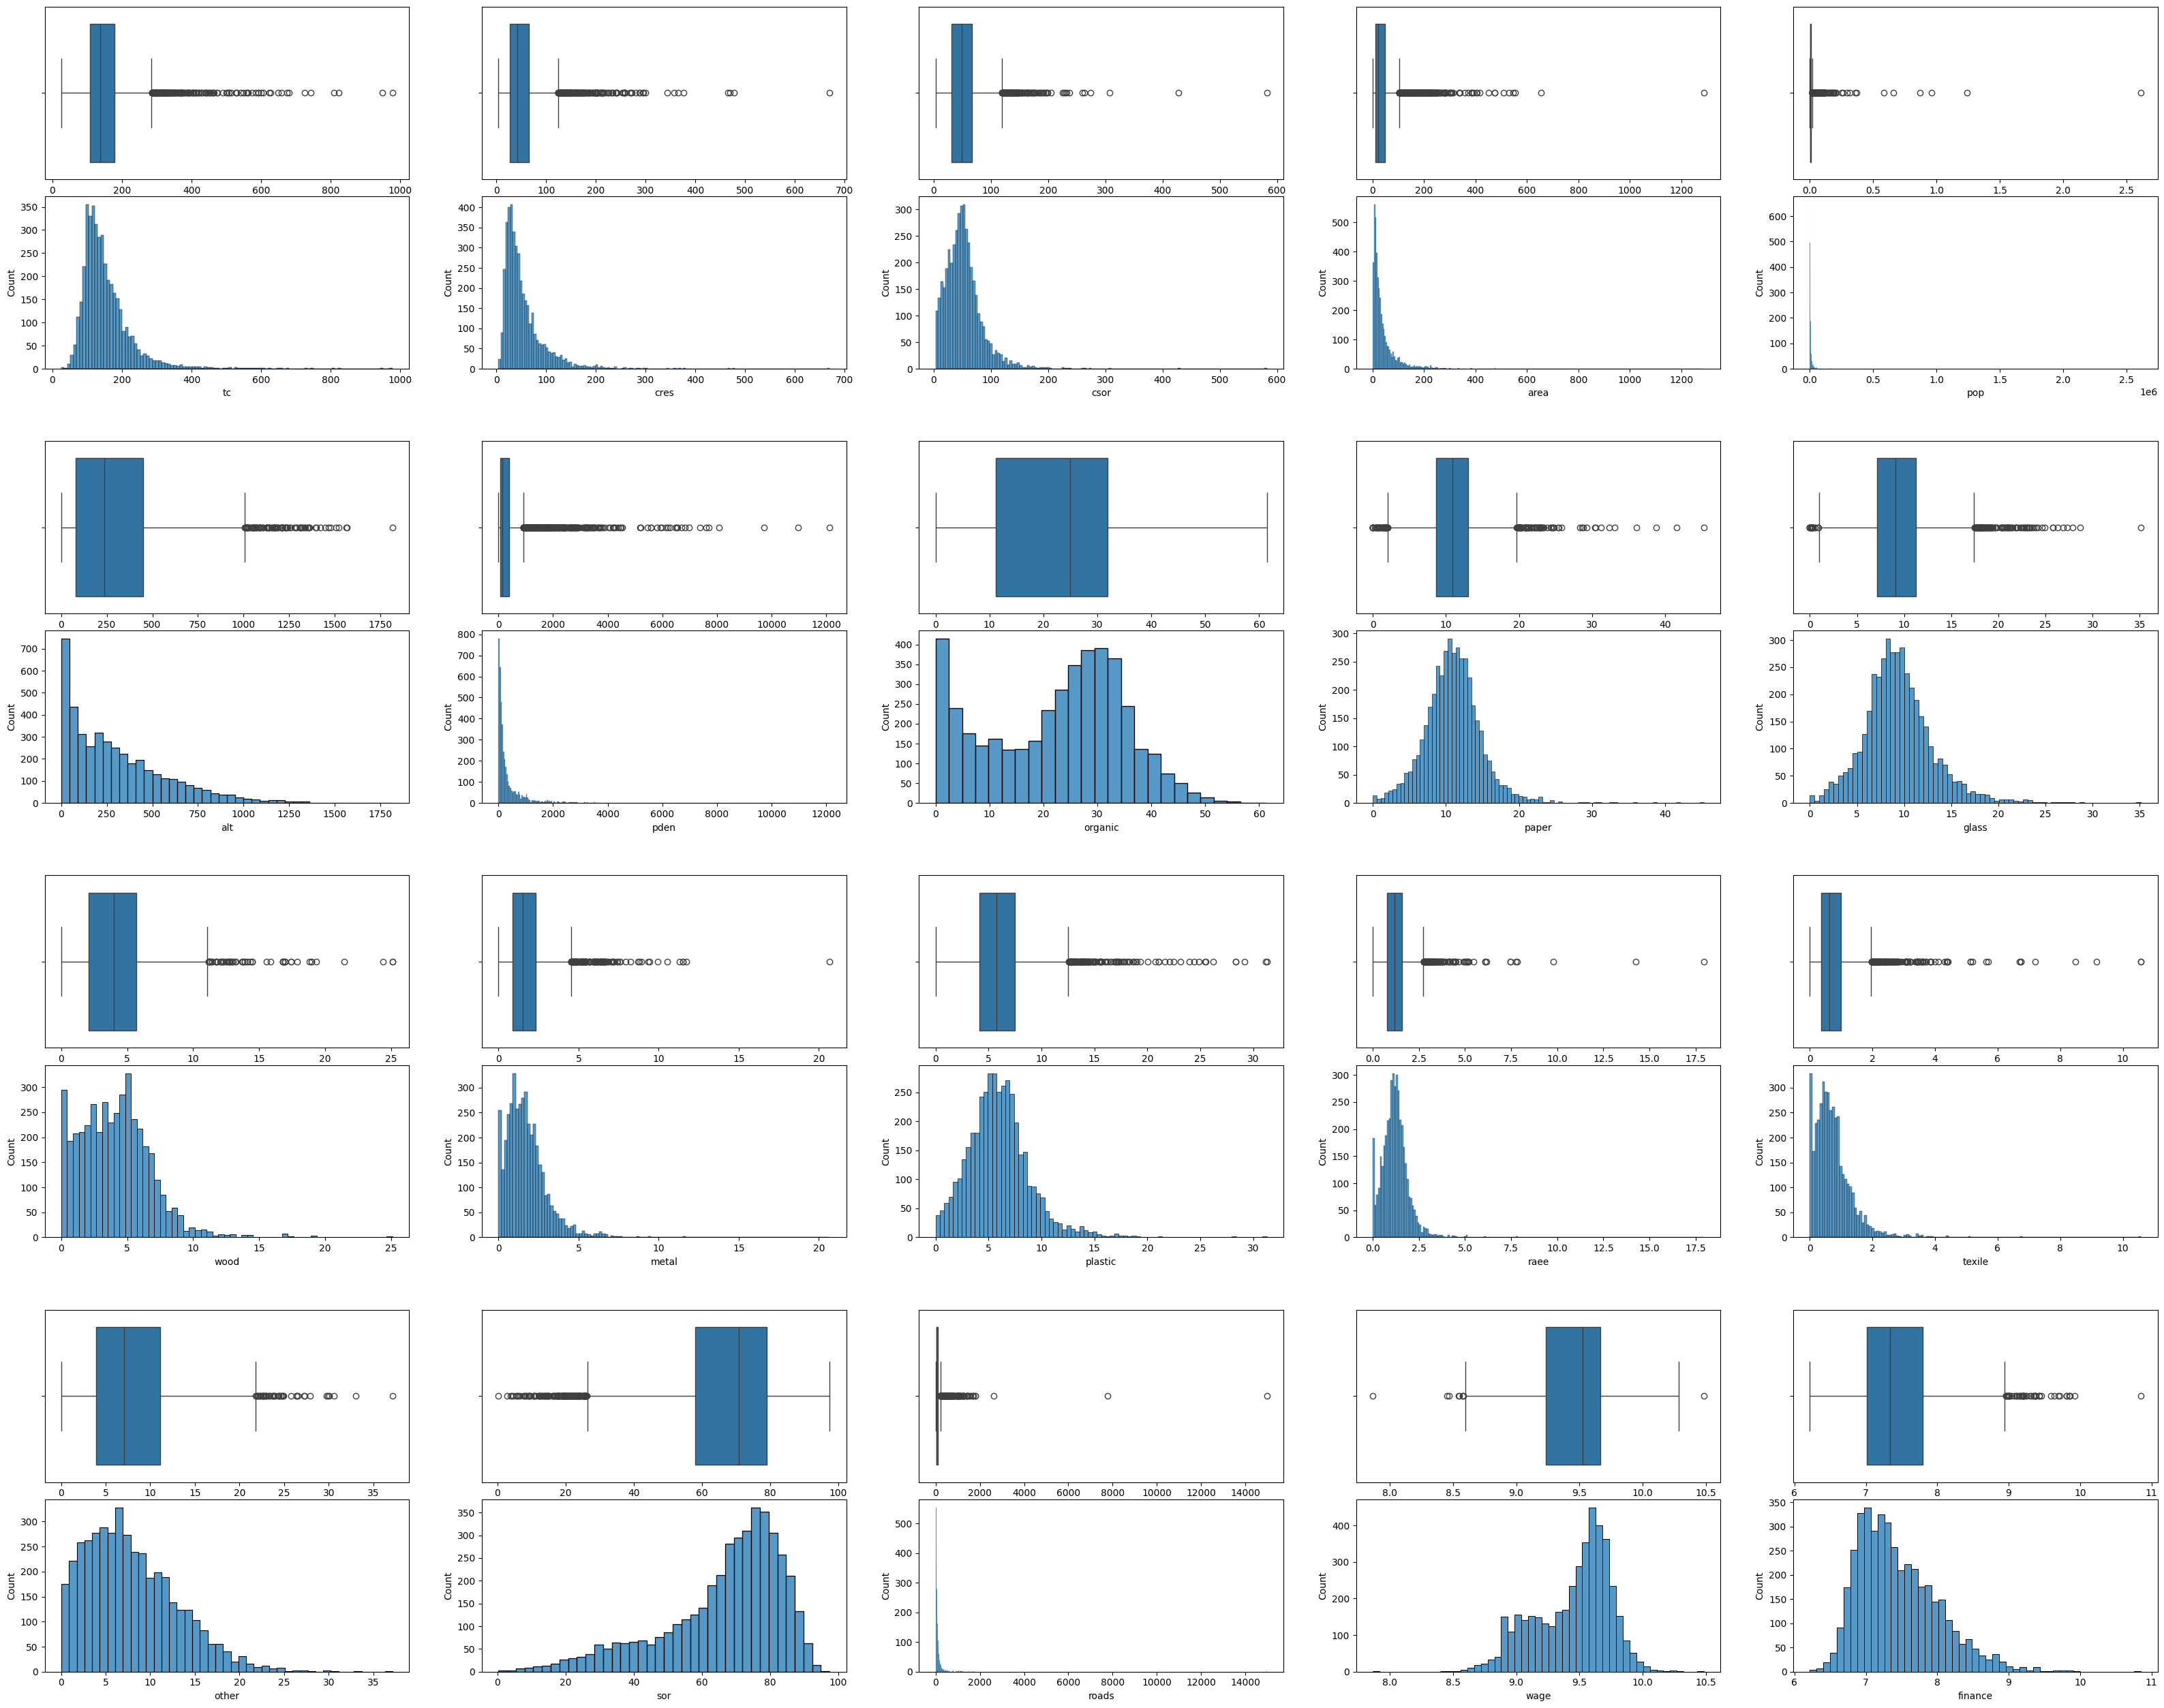

In [26]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(40, 40))
outer = gridspec.GridSpec(5, 5, wspace=0.2, hspace=0.2)

col_names = WASTE_GENERATION_df.drop(categorical_columns,axis=1).columns

for i,col in enumerate(col_names):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,
                    subplot_spec=outer[i], wspace=0.1, hspace=0.1)

    ax = plt.Subplot(fig, inner[0])
    sns.boxplot(ax=ax,x = WASTE_GENERATION_df[col])
    fig.add_subplot(ax)
    
    ax = plt.Subplot(fig, inner[1])
    sns.histplot(ax=ax,x = WASTE_GENERATION_df[col])
    fig.add_subplot(ax)
    

In [27]:
import numpy as np

def outlier_treatment(data,features):
    
    for feature in features:    
        q1 = np.percentile(data[feature],25)
        q3 = np.percentile(data[feature],75)
        
        iqr = q3-q1
        
        l = q1-(1.5*iqr)
        u = q3+(1.5*iqr)
        
    
        median = int(np.median(data[feature].values))
        mean = int(np.mean(data[feature].values))
        population = None
        
        if mean>median:
            population = data[(data[feature]>=np.percentile(data[feature],20)) & (data[feature]<=np.percentile(data[feature],45))]

        else:
            population = data[(data[feature]>=np.percentile(data[feature],60)) & (data[feature]<=np.percentile(data[feature],85))]

       
        data[feature] = np.where(data[feature]<l,population[feature].sample(1),
                                np.where(data[feature]>u,population[feature].sample(1),data[feature]))
      
features = WASTE_GENERATION_df.drop(categorical_columns,axis=1).columns        
outlier_treatment(WASTE_GENERATION_df,features)    
    

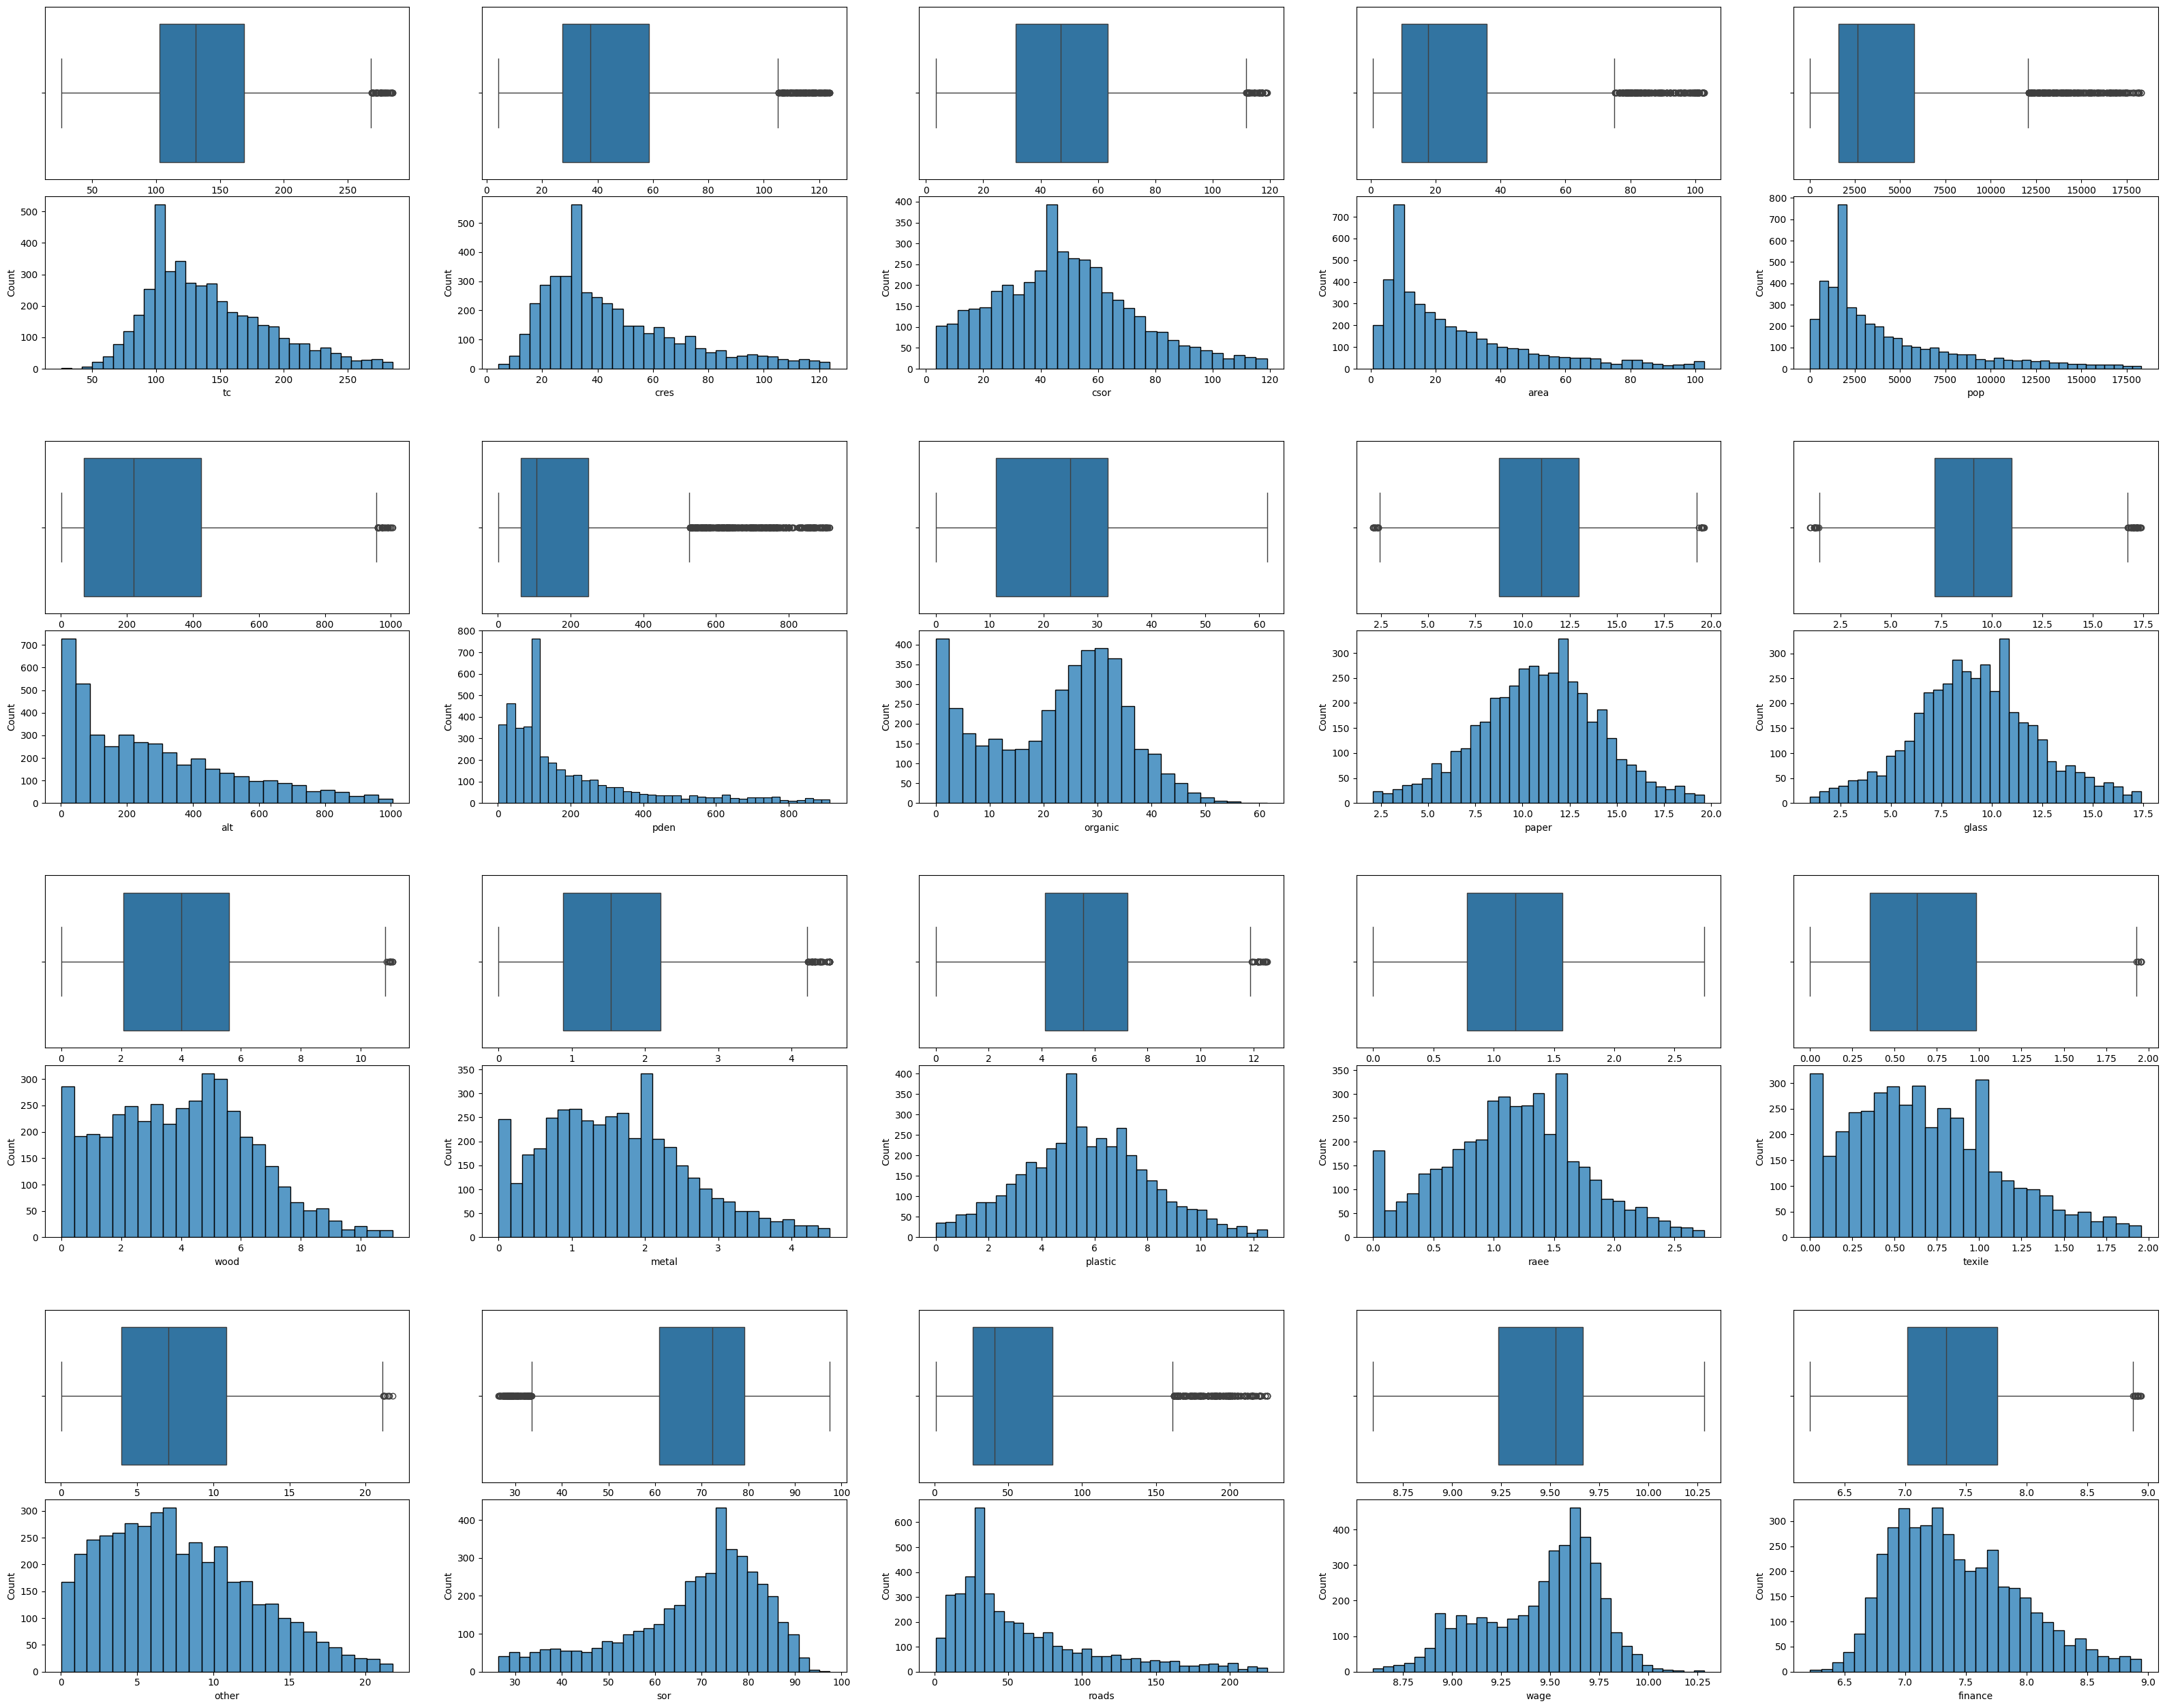

In [28]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(40, 40))
outer = gridspec.GridSpec(5, 5, wspace=0.2, hspace=0.2)

col_names = WASTE_GENERATION_df.drop(categorical_columns,axis=1).columns

for i,col in enumerate(col_names):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,
                    subplot_spec=outer[i], wspace=0.1, hspace=0.1)

    ax = plt.Subplot(fig, inner[0])
    sns.boxplot(ax=ax,x = WASTE_GENERATION_df[col])
    fig.add_subplot(ax)
    
    ax = plt.Subplot(fig, inner[1])
    sns.histplot(ax=ax,x = WASTE_GENERATION_df[col])
    fig.add_subplot(ax)
    

In [29]:
WASTE_GENERATION_df[categorical_columns].head()

region               province                  name   istat  isle  \
0  Emilia_Romagna                Ferrara             Comacchio   38006   0.0   
1  Emilia_Romagna                Ferrara             Lagosanto   38011   0.0   
2  Emilia_Romagna                Ferrara                  Goro   38025   0.0   
3  Emilia_Romagna                Ferrara                Mesola   38014   0.0   
4          Puglia  Barletta-Andria-Trani  Margherita di Savoia  110005   0.0   

   sea  urb       fee  d_fee  sample  geo  
0  1.0  2.0      PAYT      1       1  3.0  
1  1.0  3.0      PAYT      1       1  3.0  
2  1.0  3.0      PAYT      1       1  3.0  
3  1.0  3.0      PAYT      1       1  3.0  
4  1.0  2.0  STANDARD      0       0  1.0

In [30]:
WASTE_GENERATION_df['region'].value_counts()

region
Lombardia                1199
Campania                  389
Emilia_Romagna            307
Veneto                    261
Toscana                   231
Sicilia                   208
Friuli_Venezia_Giulia     183
Lazio                     180
Liguria                   179
Calabria                  158
Abruzzo                   150
Trentino_Alto_Adige       150
Puglia                    126
Sardegna                  121
piemonte                  114
Marche                    102
Molise                     69
Basilicata                 65
Umbria                     59
Valle_d'Aosta               1
Name: count, dtype: int64

In [31]:
WASTE_GENERATION_df.drop(['province','name','istat'],axis=1,inplace=True)

In [32]:
[categorical_columns.remove(feature) for feature in ['province','name','istat']]
categorical_columns                         

['region', 'isle', 'sea', 'urb', 'fee', 'd_fee', 'sample', 'geo']

In [33]:
WASTE_GENERATION_df[categorical_columns].head()

region  isle  sea  urb       fee  d_fee  sample  geo
0  Emilia_Romagna   0.0  1.0  2.0      PAYT      1       1  3.0
1  Emilia_Romagna   0.0  1.0  3.0      PAYT      1       1  3.0
2  Emilia_Romagna   0.0  1.0  3.0      PAYT      1       1  3.0
3  Emilia_Romagna   0.0  1.0  3.0      PAYT      1       1  3.0
4          Puglia   0.0  1.0  2.0  STANDARD      0       0  1.0

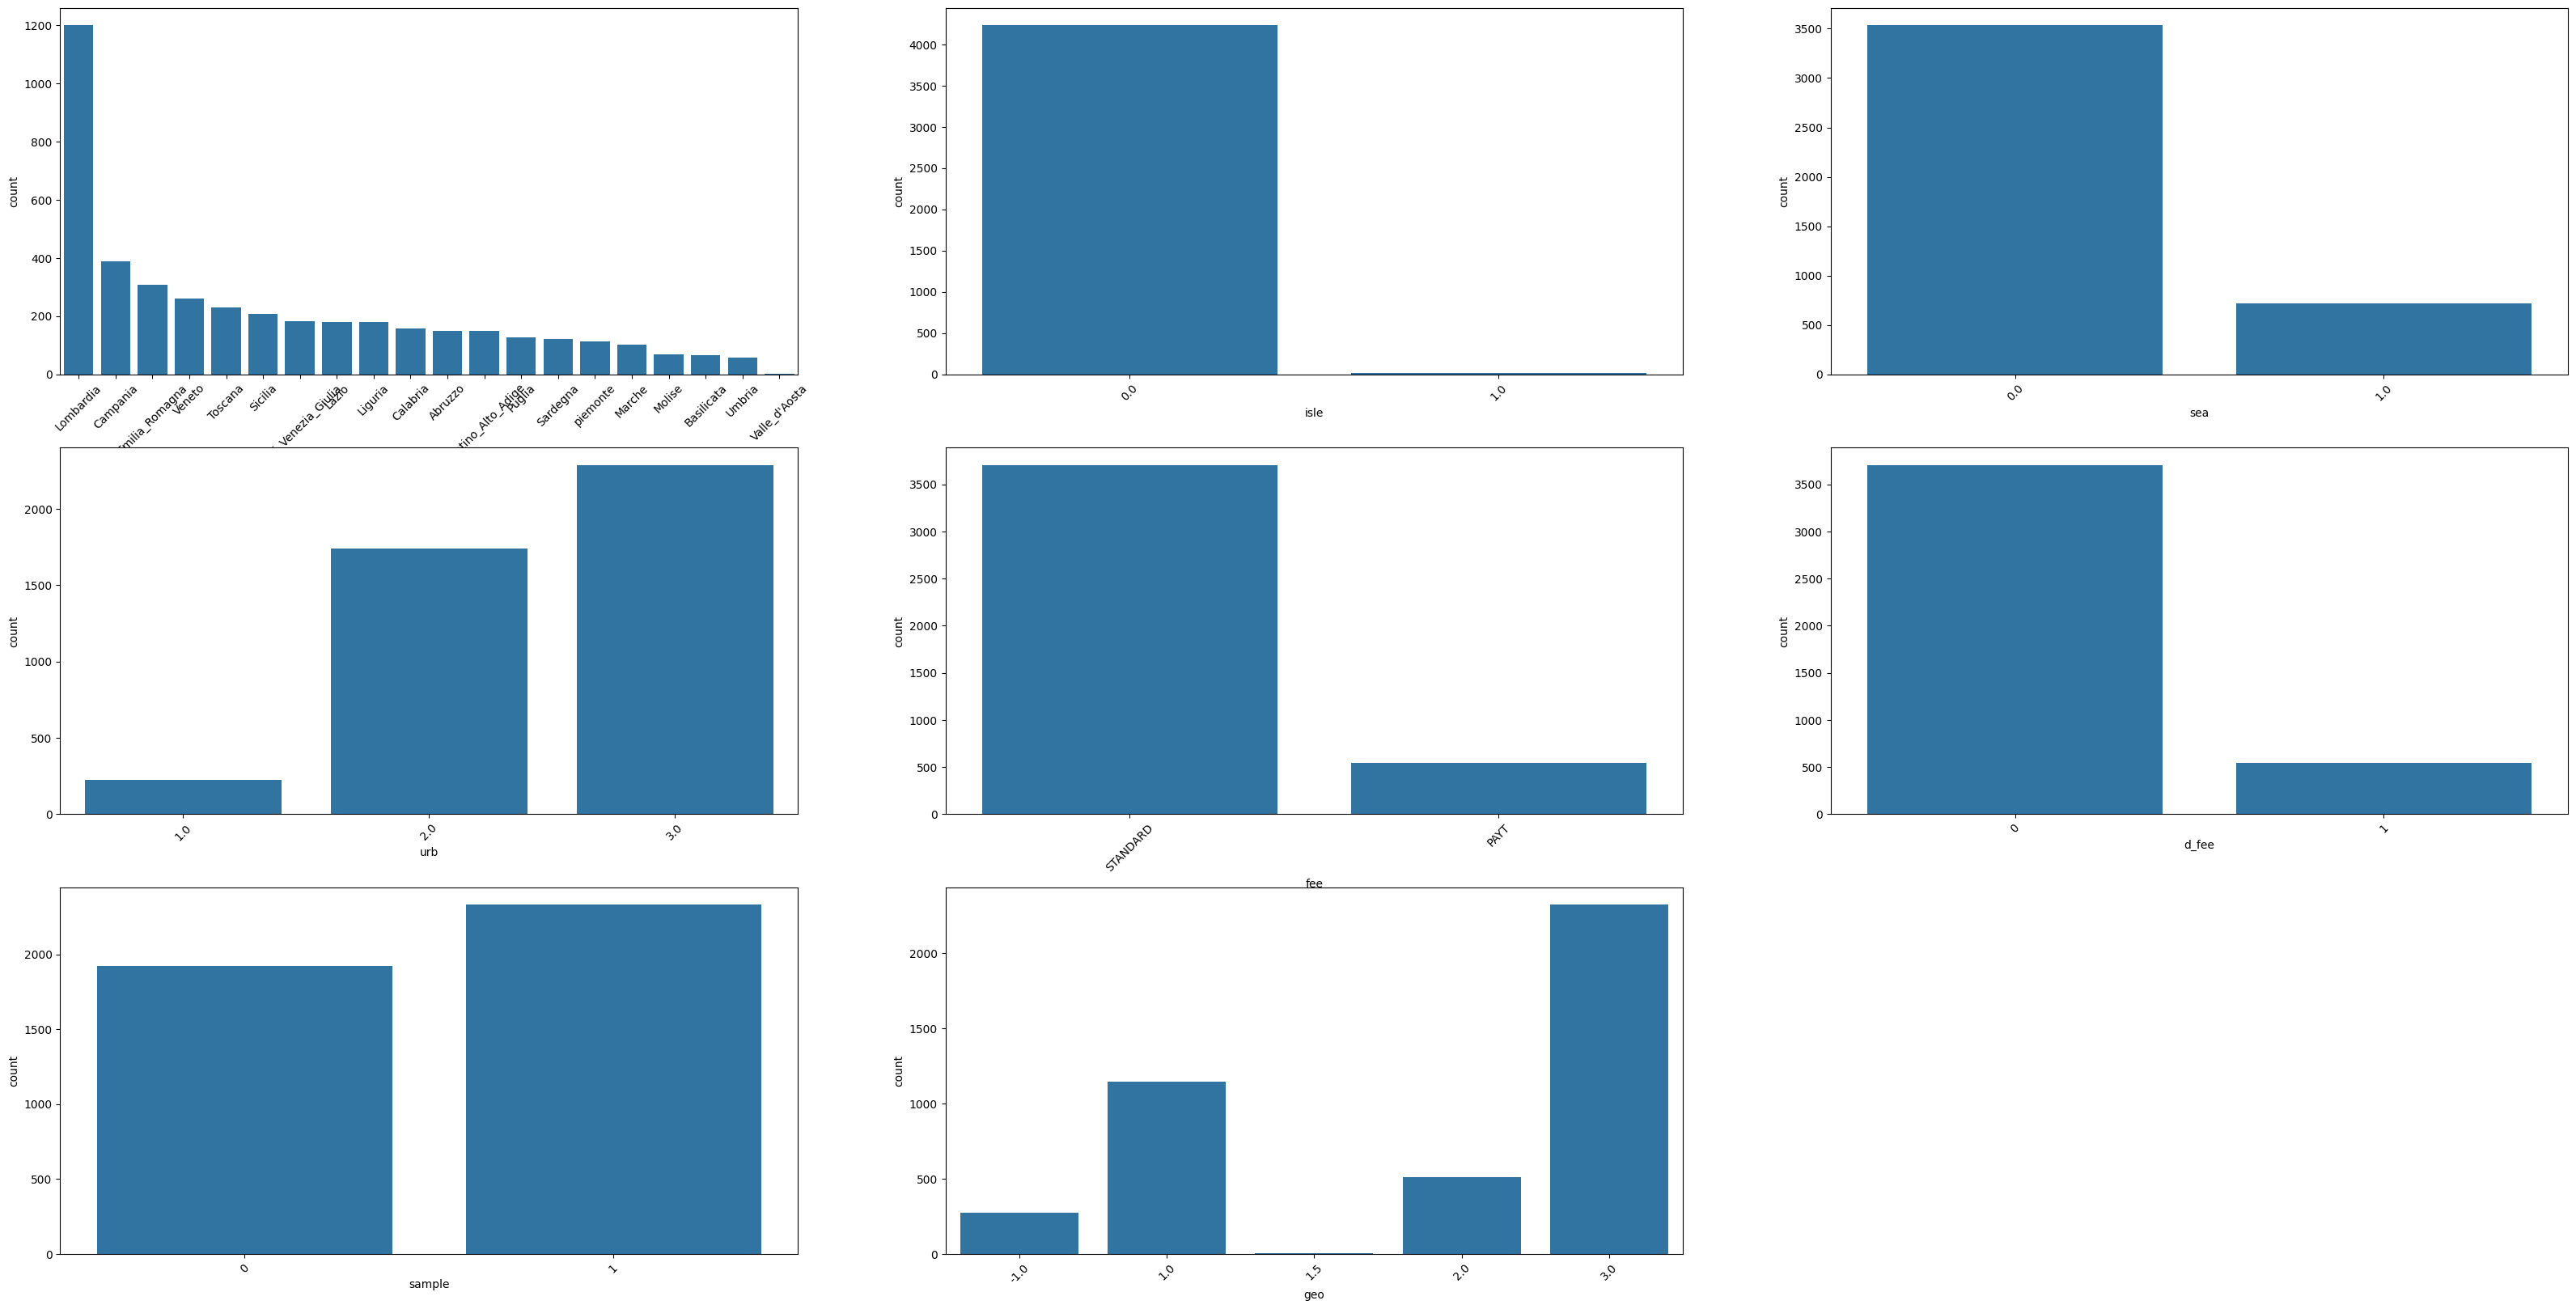

In [34]:
plt.figure(figsize=(40,20))

for idx,col in enumerate(categorical_columns):
    plt.subplot(3,3,idx+1)
    sns.barplot(WASTE_GENERATION_df[col].value_counts())
    plt.xticks(rotation = 45)

In [35]:
WASTE_GENERATION_df.drop('isle',axis=1, inplace=True)
categorical_columns.remove('isle')

In [36]:
WASTE_GENERATION_df = WASTE_GENERATION_df[WASTE_GENERATION_df['geo']!= 1.5]
WASTE_GENERATION_df['geo'].value_counts()

geo
 3.0    2323
 1.0    1147
 2.0     508
-1.0     271
Name: count, dtype: int64

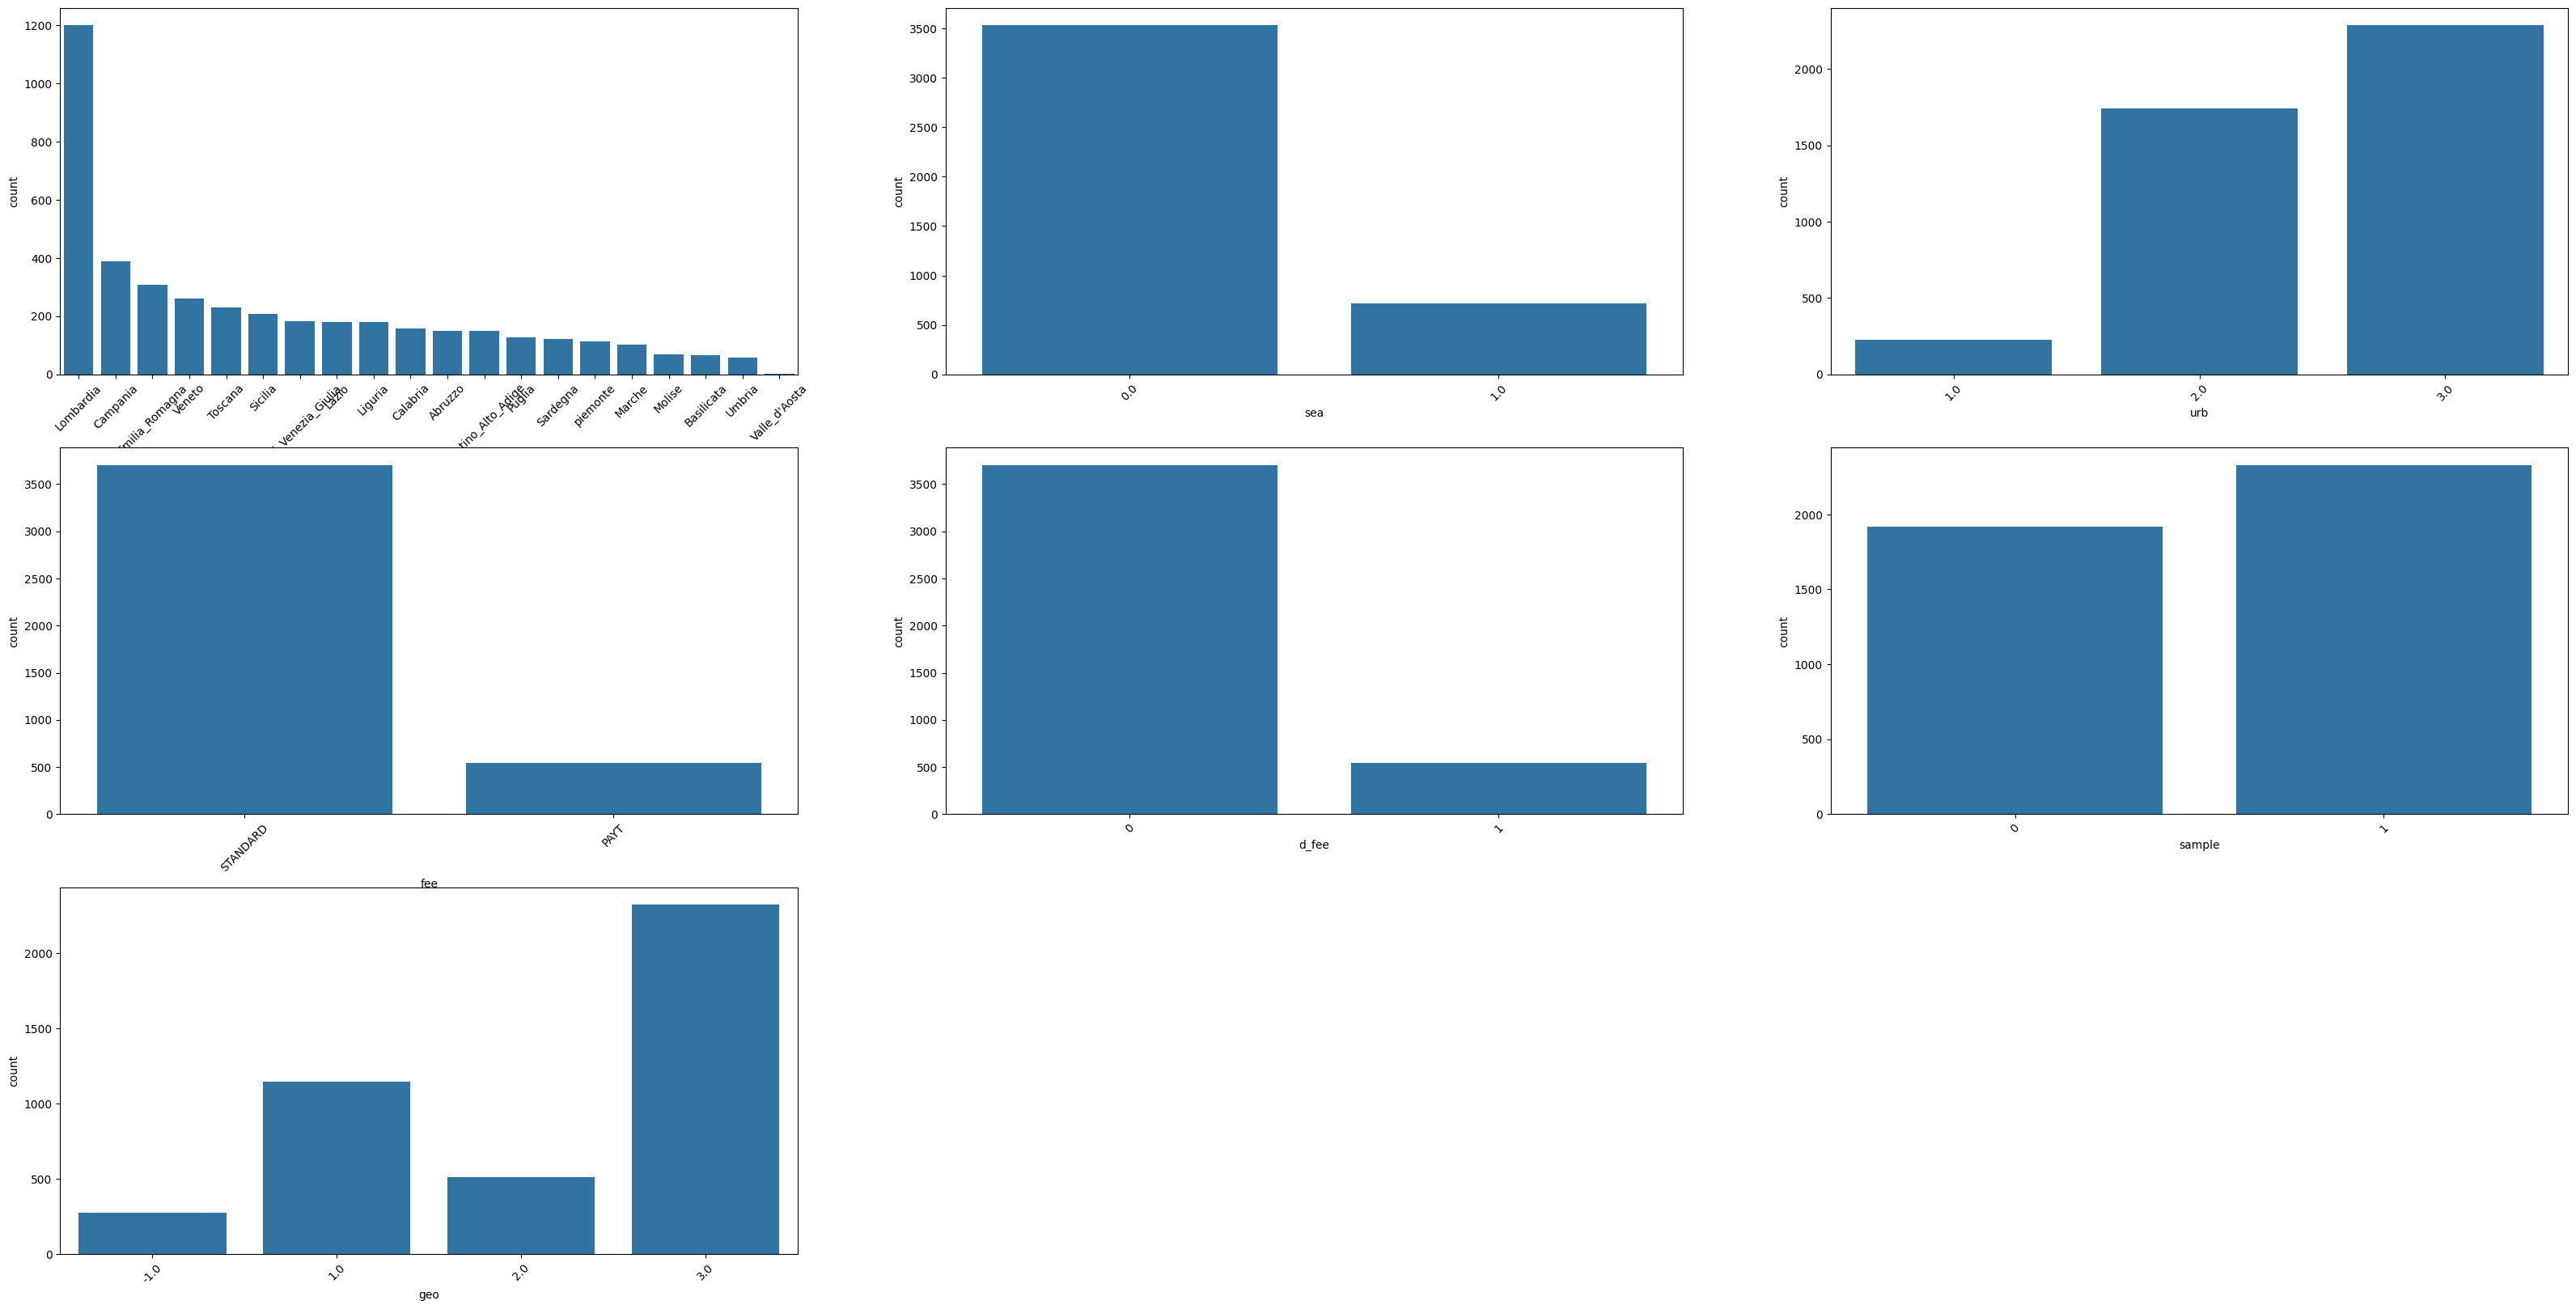

In [37]:
plt.figure(figsize=(40,20))

for idx,col in enumerate(categorical_columns):
    plt.subplot(3,3,idx+1)
    sns.barplot(WASTE_GENERATION_df[col].value_counts())
    plt.xticks(rotation = 45)

In [49]:
WASTE_GENERATION_df.drop('fee',axis=1,inplace=True)
categorical_columns.remove('fee')

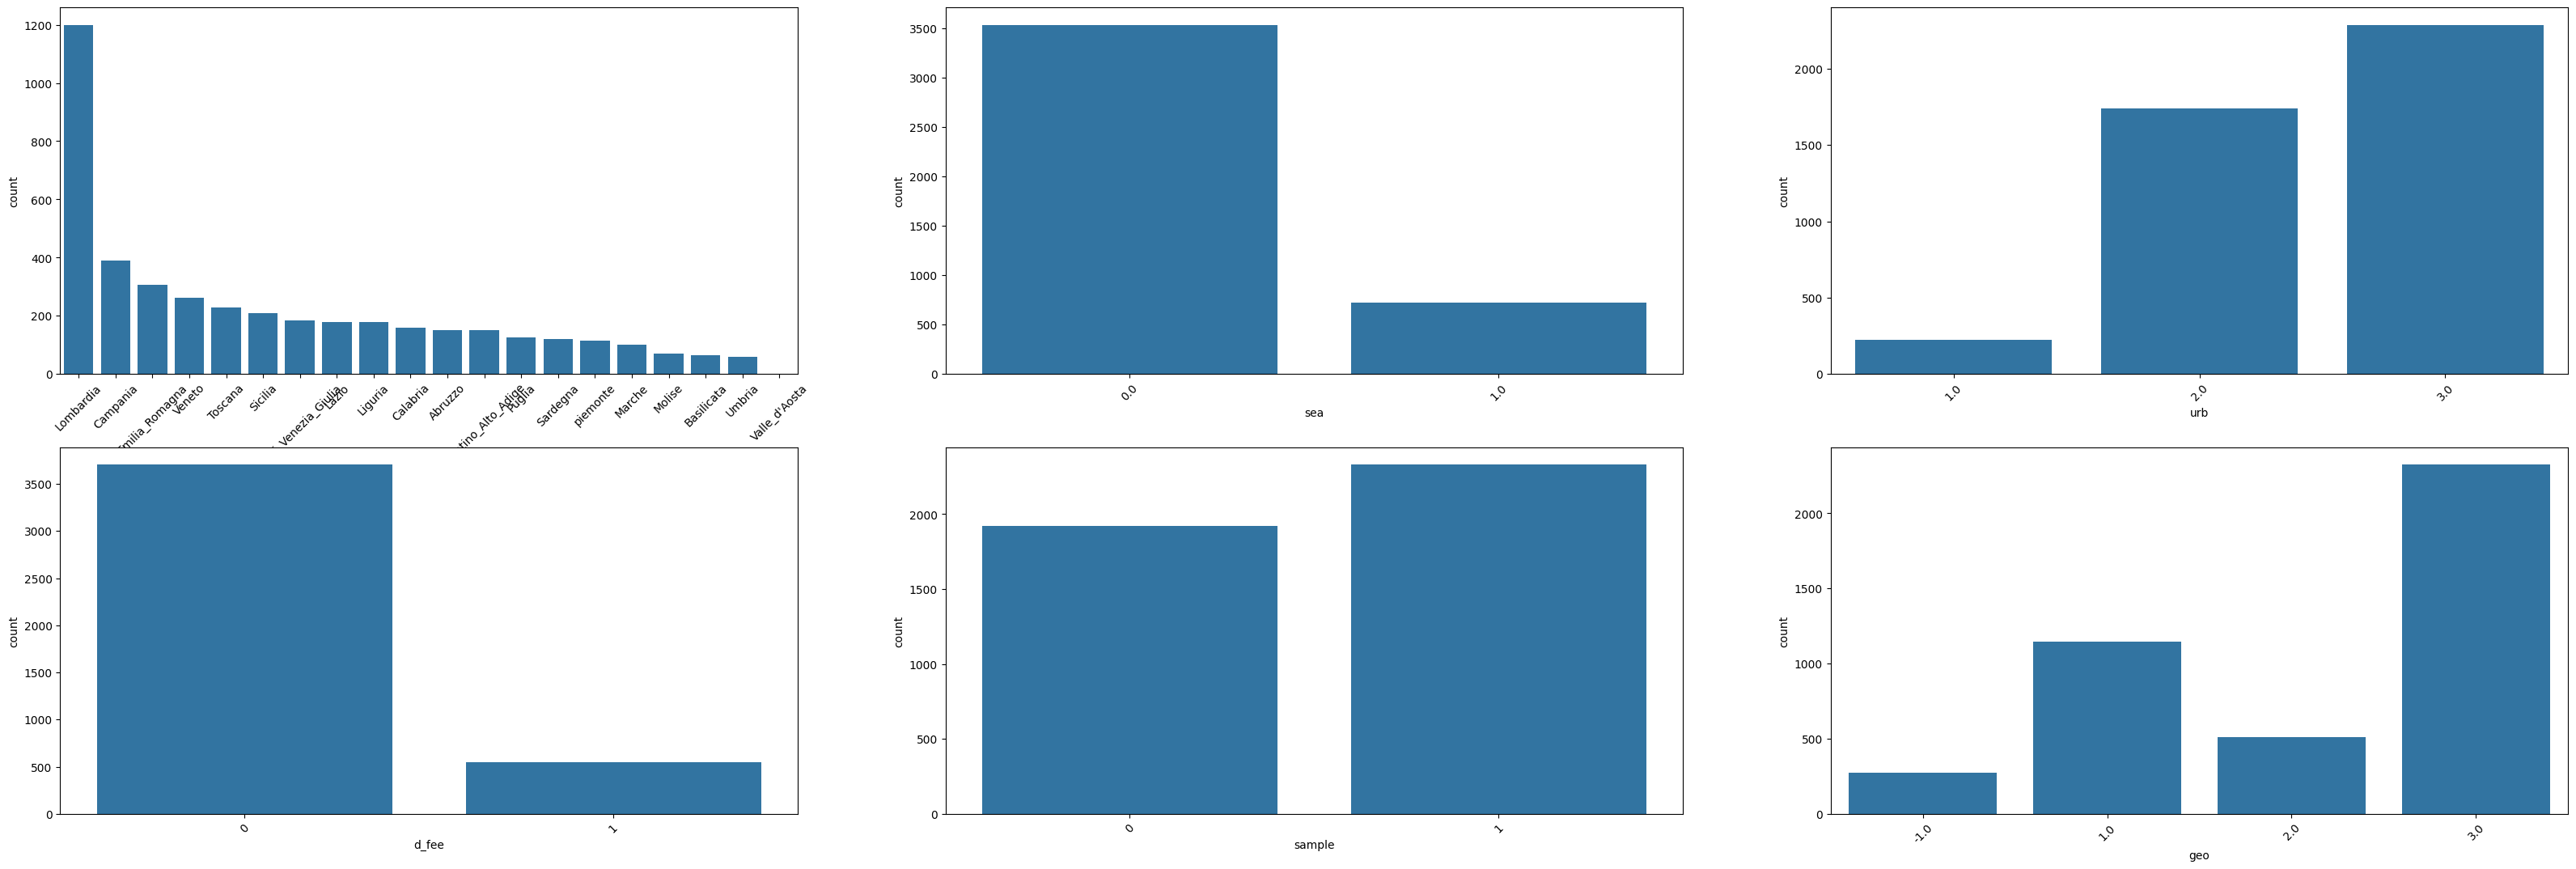

In [50]:
plt.figure(figsize=(40,20))

for idx,col in enumerate(categorical_columns):
    plt.subplot(3,3,idx+1)
    sns.barplot(WASTE_GENERATION_df[col].value_counts())
    plt.xticks(rotation = 45)

In [38]:
WASTE_GENERATION_df[['region','finance']].groupby('region').var()

finance
region                         
Abruzzo                0.277707
Basilicata             0.235062
Calabria               0.243307
Campania               0.293102
Emilia_Romagna         0.140447
Friuli_Venezia_Giulia  0.162076
Lazio                  0.170196
Liguria                0.181772
Lombardia              0.166417
Marche                 0.172001
Molise                 0.242148
Puglia                 0.159131
Sardegna               0.277508
Sicilia                0.186059
Toscana                0.224923
Trentino_Alto_Adige    0.170483
Umbria                 0.148281
Valle_d'Aosta               NaN
Veneto                 0.158295
piemonte               0.142762

In [39]:
WASTE_GENERATION_df['finance'].var()

0.2706423487673553

In [75]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(WASTE_GENERATION_df.iloc[:,:-1],WASTE_GENERATION_df.iloc[:,-1])

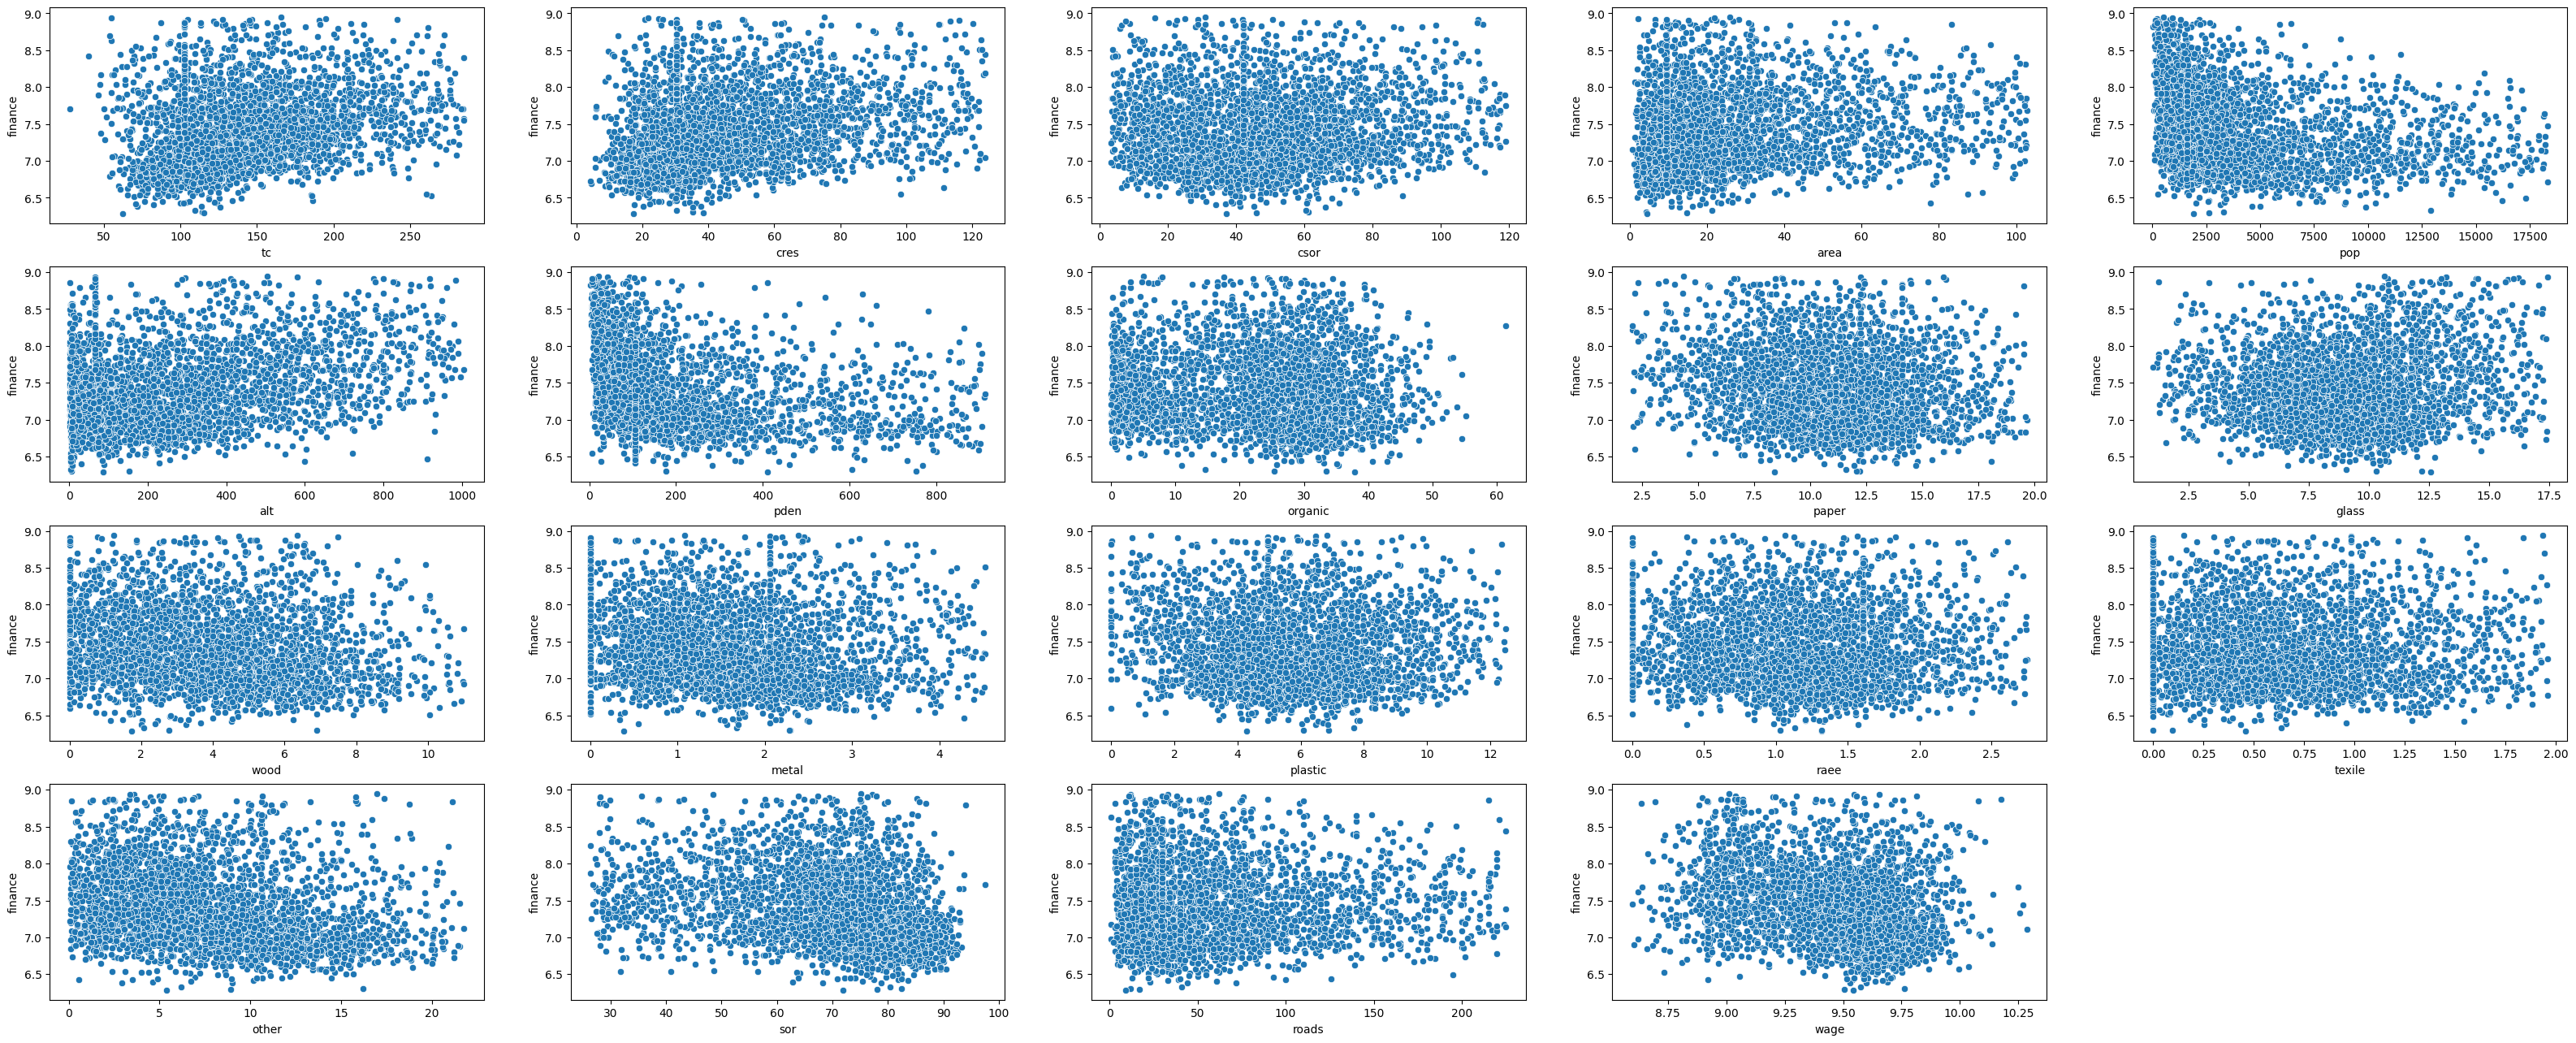

In [61]:
numerical_columns = xtrain.drop(categorical_columns, axis=1).columns

plt.figure(figsize=(40,20))
for idx,col in enumerate(numerical_columns):
    plt.subplot(5,5,idx+1)
    sns.scatterplot(x = xtrain[col],y = ytrain)

In [55]:
xtrain.columns

Index(['region', 'tc', 'cres', 'csor', 'area', 'pop', 'alt', 'sea', 'pden',
       'urb', 'd_fee', 'sample', 'organic', 'paper', 'glass', 'wood', 'metal',
       'plastic', 'raee', 'texile', 'other', 'sor', 'geo', 'roads', 'wage'],
      dtype='object')

In [76]:
from sklearn.preprocessing import TargetEncoder, RobustScaler
from sklearn.compose import ColumnTransformer

from sklearn import set_config
set_config(display='diagram')

transformer = ColumnTransformer(transformers=[
    
        ('Target_encoder',TargetEncoder(),['region']),
        ('Robust_scaler',RobustScaler(),xtrain.drop(categorical_columns,axis=1).columns)
        
], remainder = 'passthrough')

transformer.fit(xtrain,ytrain)

ColumnTransformer(remainder='passthrough',
                  transformers=[('Target_encoder', TargetEncoder(), ['region']),
                                ('Robust_scaler', RobustScaler(),
                                 Index(['tc', 'cres', 'csor', 'area', 'pop', 'alt', 'pden', 'organic', 'paper',
       'glass', 'wood', 'metal', 'plastic', 'raee', 'texile', 'other', 'sor',
       'roads', 'wage'],
      dtype='object'))])

In [78]:
xtrain_transformed = transformer.transform(xtrain)
xtrain_transformed

array([[ 7.34495797,  0.19117106, -0.16478271, ...,  0.        ,
         1.        ,  3.        ],
       [ 7.44705239,  0.29766128, -0.64336888, ...,  0.        ,
         0.        ,  2.        ],
       [ 7.661951  ,  0.34293457,  1.11303919, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 6.98103447, -0.80303822,  0.06225123, ...,  0.        ,
         1.        ,  3.        ],
       [ 7.65988462,  0.40354973, -0.12593536, ...,  0.        ,
         0.        ,  2.        ],
       [ 7.49732125, -0.12378727, -0.28036938, ...,  1.        ,
         1.        ,  3.        ]])

In [83]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor(n_neighbors = 10)
KNN.fit(xtrain_transformed,ytrain)

KNeighborsRegressor(n_neighbors=10)

In [87]:
xtest_transformed = transformer.transform(xtest)
xtest_transformed

array([[ 7.12269642, -0.28487623, -0.56185322, ...,  0.        ,
         1.        ,  3.        ],
       [ 7.12269642, -0.26863194, -0.25298518, ...,  0.        ,
         1.        ,  3.        ],
       [ 6.98103447, -0.30849058, -0.3188983 , ...,  0.        ,
         1.        ,  3.        ],
       ...,
       [ 7.44705239, -0.16439789,  2.09855119, ...,  0.        ,
         0.        ,  2.        ],
       [ 7.49732125, -0.51455207, -0.16191692, ...,  0.        ,
         1.        ,  3.        ],
       [ 7.12269642, -0.16665406, -0.48384014, ...,  0.        ,
         1.        ,  3.        ]])

In [88]:
ypred = KNN.predict(xtest_transformed)
ypred

array([6.93092879, 6.98832932, 7.04375605, ..., 7.93244946, 7.26784949,
       6.87258054])

In [94]:
from sklearn.metrics import mean_squared_error

mean_squared_error(ypred,ytest)


0.1659472779809192